Analysis:
    1. The higher the latitude of a city, the colder it gets.
    2. The lower the latitude of a city is, the higher the wind speed gets.
    3. The latitude of a city does not determine the humidity, from what the current data/graph shows.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import random
from citipy import citipy


In [9]:
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lon = np.random.uniform(low=-180.000, high=180.000, size=1500)

Generate Cities List

In [10]:
coord = {"Lat":lat, "Lon":lon}
df = pd.DataFrame(coord)
weather_df = df.sample(n=50)
weather_df["Temperature"]=""
weather_df["Humidity"]=""
weather_df["Cloudiness"]=""
weather_df["Wind_Speed"]=""

In [11]:
weather_df = weather_df.reset_index(drop=True)

In [12]:
coordinates= tuple(zip(weather_df["Lat"],weather_df["Lon"]))

cities = []
city_name = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

for city in cities:
    name = city.city_name
    city_name.append(name)
weather_df["City Name"] = city_name
weather_df.head()

,Lat,Lon,Temperature,Humidity,Cloudiness,Wind_Speed,City Name
0,-21.011069,-16.798406,,,,,jamestown
1,82.064300,-93.970827,,,,,qaanaaq
2,41.667967,160.289582,,,,,severo-kurilsk
3,-62.796552,53.542121,,,,,taolanaro
4,-89.266195,106.570554,,,,,albany


In [19]:
#target_url = "http://api.openweathermap.org/data/2.5/weather?appid=%slat=%slon=%s" % (openweather_api_key,lat,lon)

weather_data=[]


url = "http://api.openweathermap.org/data/2.5/weather"
units = "imperial"
appid = "ba438d90c804143e30b6e9f58e2e7453"

params = {
    "q":" ",
    "units":units,
    "appid":appid
}

#query_url = url + "appid=" + openweather_api_key + "&q=" + city + "&units=" + units
#Count the Rows
row_count = 0

#loop through each row
for index,row in weather_df.iterrows():
#     try:
    #Build URL
    # This link helps to handily see the JSON generated for each query
    print("Now retrieving city #%s: %s" % (row_count, weather_df.loc[index]["City Name"]))
    row_count += 1
    #Json
    params["q"]= weather_df.loc[index]["City Name"]
    response = req.get(url,params).json()
    weather_data.append(response)
    #get data from responses
    temp_data = [data.get("main").get("temp") for data in weather_data]
    humidity_data = [data.get("main").get("humidity") for data in weather_data]
    cloud_data = [data.get("clouds").get("all") for data in weather_data]
    wind_data = [data.get("wind").get("speed") for data in weather_data]
    #Rebuild dataframe
    weather_df.set_value(index, "Temperature", float(temp_data[-1]))
    weather_df.set_value(index, "Humidity", float(humidity_data[-1]))
    weather_df.set_value(index, "Cloudiness", float(cloud_data[-1]))
    weather_df.set_value(index, "Wind_Speed", float(wind_data[-1]))
    #Reset
    temp_data = []
    humidity_data = []
    cloud_data = []
    wind_data = []
    print(row)  
#     except AttributeError:
#         print("Skipping this one")
            


Now retrieving city #0: jamestown
Lat             -21.0111
Lon             -16.7984
Temperature        50.49
Humidity              87
Cloudiness            90
Wind_Speed          8.05
City Name      jamestown
Name: 0, dtype: object
Now retrieving city #1: qaanaaq
Lat            82.0643
Lon           -93.9708
Temperature       -2.8
Humidity           100
Cloudiness          24
Wind_Speed       11.23
City Name      qaanaaq
Name: 1, dtype: object
Now retrieving city #2: severo-kurilsk
Lat                    41.668
Lon                    160.29
Temperature             37.35
Humidity                   97
Cloudiness                 92
Wind_Speed              34.94
City Name      severo-kurilsk
Name: 2, dtype: object
Now retrieving city #3: taolanaro
Lat             -62.7966
Lon              53.5421
Temperature         71.6
Humidity              88
Cloudiness            75
Wind_Speed          6.76
City Name      taolanaro
Name: 3, dtype: object
Now retrieving city #4: albany
Lat           -89

Lat             71.8905
Lon             72.2174
Temperature       11.56
Humidity             96
Cloudiness           88
Wind_Speed         8.66
City Name      yar-sale
Name: 37, dtype: object
Now retrieving city #38: cherskiy
Lat             87.1797
Lon             158.371
Temperature        5.35
Humidity             83
Cloudiness           92
Wind_Speed        10.89
City Name      cherskiy
Name: 38, dtype: object
Now retrieving city #39: arraial do cabo
Lat                   -39.6849
Lon                   -26.8854
Temperature              76.63
Humidity                    84
Cloudiness                  44
Wind_Speed               21.97
City Name      arraial do cabo
Name: 39, dtype: object
Now retrieving city #40: vardo
Lat            82.6805
Lon            37.4635
Temperature      37.75
Humidity           100
Cloudiness          88
Wind_Speed        8.77
City Name        vardo
Name: 40, dtype: object
Now retrieving city #41: saint george
Lat                 29.5977
Lon               

In [20]:
weather_df.dropna()
#weather_df["Lat"] = weather_df["Lat"].astype('float')
weather_df

,Lat,Lon,Temperature,Humidity,Cloudiness,Wind_Speed,City Name
0,-21.011069,-16.798406,50.49,87,90,8.05,jamestown
1,82.064300,-93.970827,-2.8,100,24,11.23,qaanaaq
2,41.667967,160.289582,37.35,97,92,34.94,severo-kurilsk
3,-62.796552,53.542121,71.6,88,75,6.76,taolanaro
4,-89.266195,106.570554,42.42,87,90,17.22,albany
5,-9.384327,32.847762,65.16,78,36,5.64,nakonde
6,-70.248377,-92.111925,35.6,74,20,18.34,punta arenas
7,-64.031297,-178.150466,80.6,88,75,2.24,vaini
8,26.280647,18.267781,37.53,76,44,2.62,waddan
9,44.887688,26.841854,43.11,98,88,5.75,bradeanu


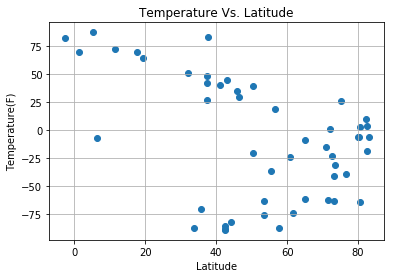

In [21]:
#Plotting

# Build a scatter plot for each data type
plt.scatter(weather_df["Temperature"], 
            weather_df["Lat"], marker="o")
plt.title("Temperature Vs. Latitude")
plt.ylabel("Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

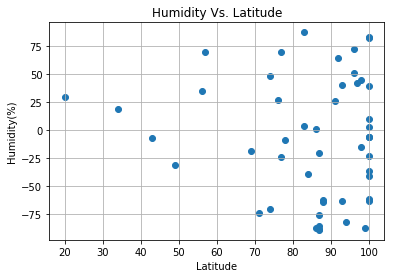

In [26]:
#Plot Humidity Vs. Latitude

# Build a scatter plot for each data type
plt.scatter(weather_df["Humidity"], 
            weather_df["Lat"],marker="o")
plt.title("Humidity Vs. Latitude")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

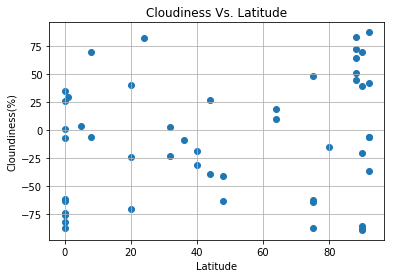

In [27]:
#Cloudiness vs. Latitude
# Build a scatter plot for each data type
plt.scatter(weather_df["Cloudiness"], 
            weather_df["Lat"], marker="o")
plt.title("Cloudiness Vs. Latitude")
plt.ylabel("Cloundiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

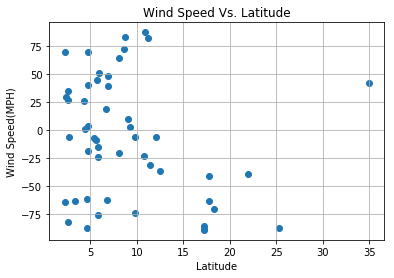

In [28]:
#Wind Speed vs. Latitude
# Build a scatter plot for each data type
plt.scatter(weather_df["Wind_Speed"], 
            weather_df["Lat"], marker="o") 
plt.title("Wind Speed Vs. Latitude")
plt.ylabel("Wind Speed(MPH)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()